<a href="https://colab.research.google.com/github/SihyeonJeon/DL24/blob/main/kospeech_A100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 초기 세팅

In [ ]:
!git clone https://github.com/alsrb0607/KoreanSTT.git '/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT'

Cloning into '/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (254/254), done.
remote: Total 397 (delta 139), reused 388 (delta 135), pack-reused 0
Receiving objects: 100% (397/397), 4.13 MiB | 6.45 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (477/477), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install hydra-core omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=91c61705186029b3b438d53ffa7c54abc25660d8748027f2d3839d2546b93ece
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
!pip install hydra-core omegaconf astropy

In [ ]:
import os
os.environ['HYDRA_FULL_ERROR'] = '1'

In [ ]:
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
!curl https://pyenv.run | bash
!pyenv install 3.10.0
!pyenv global 3.10.0
!python -m pip install --upgrade pip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   270  100   270    0     0   1491      0 --:--:-- --:--:-- --:--:--  1500


/bin/bash: line 1: pyenv: command not found
/bin/bash: line 1: pyenv: command not found


In [ ]:
!pip install -r "/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/requirements_cssiri.txt"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.5/377.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Prepa

# 오디오 전처리

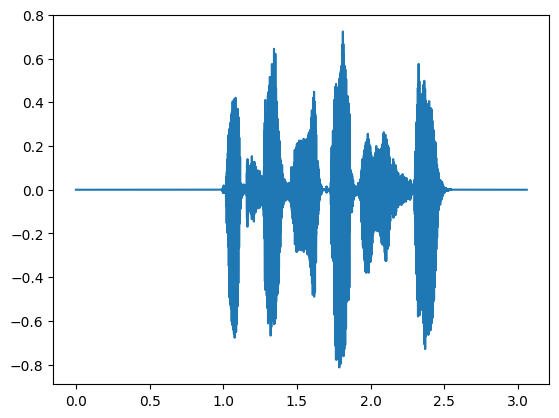

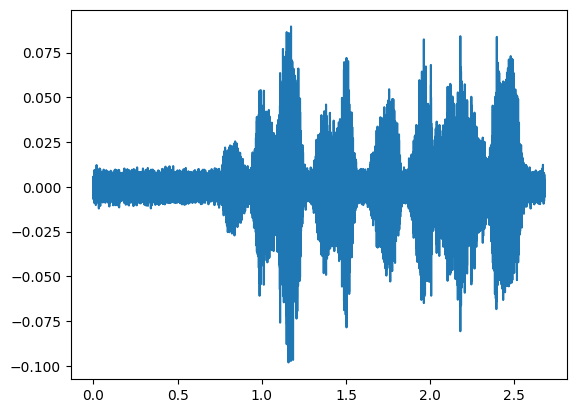

In [ ]:
import numpy as np
import os
import librosa
import soundfile as sf
import matplotlib.pyplot as plt


def trim(y):
    non_silent_start = 0
    non_silent_end = len(y)

    for i, amplitude in enumerate(y):
        if amplitude != 0:
            non_silent_start = i
            break

    for i, amplitude in enumerate(reversed(y)):
        if amplitude != 0:
            non_silent_end = len(y) - i
            break

    trimmed_y = y[non_silent_start:non_silent_end]
    return trimmed_y

def speed(y):
    speed_factor = np.random.uniform(0.8, 1.2)
    speeded_y = librosa.effects.time_stretch(y=y, rate=speed_factor)
    return speeded_y

def add_noise(y, noise_rate):
    noise = np.random.normal(0, noise_rate, len(y))  # 평균 0, 표준편차 0.01
    y_noisy = y + noise
    return y_noisy


def pre_emphasis(y, alpha=0.95):
    y_emphasized = np.append(y[0], y[1:] - alpha * y[:-1])
    return y_emphasized


def plot_data(y, sr):
    time = np.arange(len(y)) / float(sr)
    plt.plot(time, y)
    plt.show()


def pre_processing_audio_with_plot(data_path, noise_rate=0.003):
    y, sr = librosa.load(data_path, sr=None)
    y = librosa.to_mono(y)
    plot_data(y, sr)
    y = trim(y)
    y = speed(y)
    y = pre_emphasis(y)
    y = add_noise(y, noise_rate)
    plot_data(y, sr)
    return y, sr

#샘플 데이터로 테스트, 시각화
input_path = '/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/origin_dataset/script1_y_0006-23908-02-03-SJY-F-08-D.wav'
y, sr = pre_processing_audio_with_plot(input_path)

In [ ]:
def pre_processing_audio(data_path, noise_rate=0.003):
    y, sr = librosa.load(data_path, sr=None)
    y = librosa.to_mono(y)
    y = trim(y)
    y = speed(y)
    y = pre_emphasis(y)
    y = add_noise(y, noise_rate)
    return y, sr


def pre_processing_audio_without_noise(data_path):
    y, sr = librosa.load(data_path, sr=None)
    y = librosa.to_mono(y)
    y = trim(y)
    y = speed(y)
    y = pre_emphasis(y)
    return y, sr

In [ ]:
audio_dir = "/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/origin_dataset"
pre_processed_audio_dir = "/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/audio_data"
meta_dir = "/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/label_dataset"
output_file = "/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/train.txt"

In [ ]:
os.makedirs(pre_processed_audio_dir, exist_ok=True)

for file_name in os.listdir(audio_dir):
    if file_name.endswith('.wav'):
        input_data = os.path.join(audio_dir, file_name)
        output_data = os.path.join(pre_processed_audio_dir, file_name)
        y, sr = pre_processing_audio(input_data)
        sf.write(output_data, y, sr)

print("Audio preprocessing completed.")

Audio preprocessing completed.


In [ ]:
#드라이브에 중복 업로드된 데이터 제거, 데이터 6915개 확인

try:
    files_in_processed_dataset = os.listdir(pre_processed_audio_dir)
    removal_endings = ('A.wav', 'B.wav', 'C.wav', 'D.wav')

    # Identify files to remove
    files_to_remove = [file for file in files_in_processed_dataset if not file.endswith(removal_endings)]
    print(files_to_remove)
    # Remove the identified files
    for file in files_to_remove:

        os.remove(os.path.join(pre_processed_audio_dir, file))

    # List remaining files after removal
    remaining_files = os.listdir(pre_processed_audio_dir)
    print('file num after removal: ', len(remaining_files))
except Exception as e:
    print(f"An error occurred: {e}")

[]
file num after removal:  6915


# train.txt 스크립트 만들기

In [ ]:
#train.txt 만드는 스크립트
import json
import os
import re

def rule(x):
    # 괄호
    a = re.compile(r'\([^)]*\)')
    # 문장 부호
    b = re.compile('[^가-힣0-9 ]')
    x = re.sub(pattern=a, repl='', string= x)
    x = re.sub(pattern=b, repl='', string= x)
    return x

In [ ]:
#샘플링 대한 코드
cnt = 0
# 기존 파일을 덮어쓰기 위해 'w' 모드로 파일을 엽니다
with open(output_file, "w", encoding='UTF-8') as out_file:
    for file in os.listdir(pre_processed_audio_dir):
        cnt += 1
        audio_path = os.path.join(pre_processed_audio_dir, file)
        base_name = os.path.basename(file).split('.')[0]
        meta_path = os.path.join(meta_dir, base_name + '.json')

        try:
            with open(meta_path, 'r', encoding='UTF-8') as f:
                json_data = json.load(f)
                reading = json_data["전사정보"]["LabelText"]

            reading = rule(reading)

            # 파일 이름과 텍스트를 탭으로 구분하여 저장
            out_file.write(f'{file}\t{reading}\n')

        except Exception as e:
            out_file.write("------error    error--------\n")
            print(f"Error processing file {file}: {e}")

        if cnt == 300000:
            break

print("Processing complete. Total files processed:", cnt)
# 샘플 데이터 업로드 전부 다 x

Processing complete. Total files processed: 6915


In [ ]:
line_count = 0
train_txt_file = '/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/train.txt'
# Open the file and count the lines
with open(train_txt_file, 'r') as file:
    for line in file:
        line_count += 1

# Print the total number of lines
print(f'The file {train_txt_file} has {line_count} lines.')

The file /content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/train.txt has 6915 lines.


In [ ]:
#텍스트 전처리
%cd "/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT"
!python "/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/dataset/kspon/main.py" --dataset_path "/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/label_dataset" --vocab_dest "/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/vocab" --output_unit "character" --preprocess_mode 'phonetic'

/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT
Dataset Path : /content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/label_dataset
Vocab Destination : /content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/vocab
Save Path : ./data
Output-Unit : character
Preprocess Mode : phonetic
preprocess started..
성공
character
create_char_labels started..
create_script started..


In [ ]:
import pandas as pd

# CSV 파일 경로 설정
csv_path = '/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/vocab/cssiri_character_vocabs.csv'

# CSV 파일 읽기
df = pd.read_csv(csv_path)

# 행 개수 출력
print(f'The file has {len(df)} rows.')

The file has 511 rows.


# 학습

In [ ]:
#학습
!python "/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/bin/main.py" model=ds2 train=ds2_train train.dataset_path="/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/audio_data"

/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/bin/main.py:158: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path=os.path.join('..', "configs"), config_name="train")
sys:1: UserWarning: 
'audio/fbank' is validated against ConfigStore schema with the same name.
This behavior is deprecated in Hydra 1.1 and will be removed in Hydra 1.2.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/automatic_schema_matching for migration instructions.
sys:1: UserWarning: 
'model/ds2' is validated against ConfigStore schema with the same name.
This behavior is deprecated in Hydra 1.1 and will be removed in Hydra 1.2.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/automatic_schema_matching for migration instructions.
sys:1: UserWarning: 
'train/ds2_train' is validated against ConfigStore schema with the same name.
This behavior is deprecated in Hydra 1.1 and will b

       loss       cer
0  0.000845  2.670302
1  0.000391  1.822492
2  0.000365  1.534118
3  0.000332  1.381837
4  0.000280  1.274645


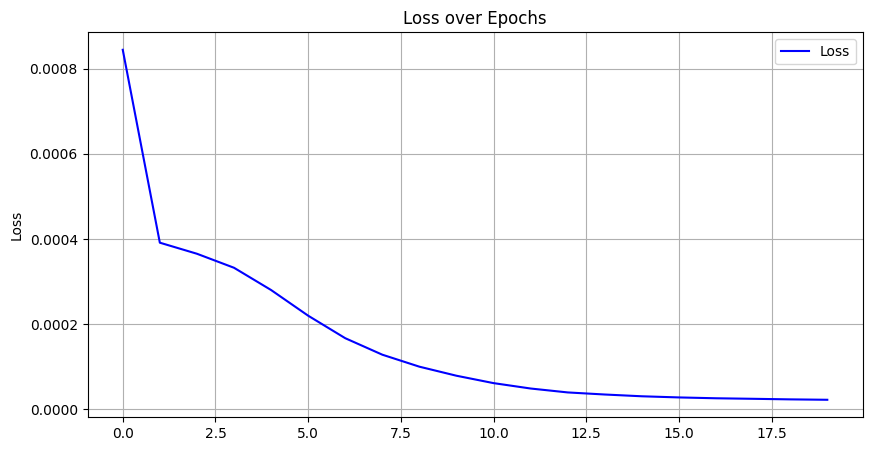

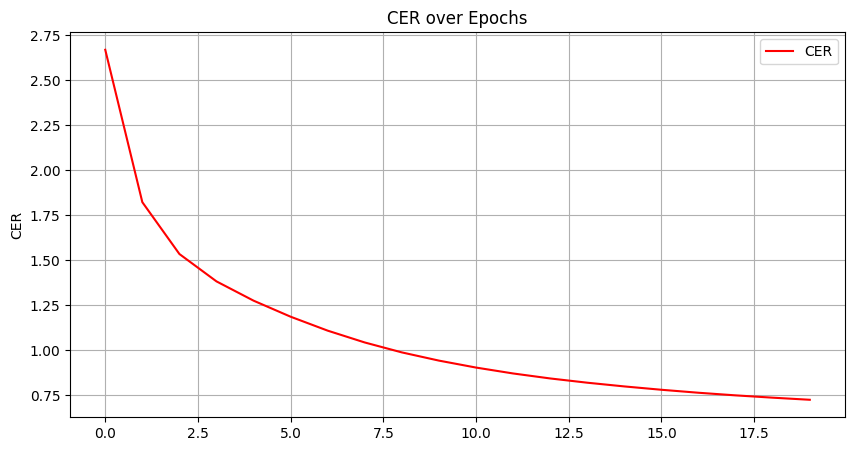

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# eval.result.csv 파일 불러오기
file_path = '/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/outputs/2024-05-25/07-20-25/eval_result.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())

# step, loss, cer 컬럼이 존재한다고 가정
# steps = data['step']
loss = data['loss']
cer = data['cer']

# loss 플로팅
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Loss', color='blue')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# cer 플로팅
plt.figure(figsize=(10, 5))
plt.plot( cer, label='CER', color='red')
#plt.xlabel('Step')
plt.ylabel('CER')
plt.title('CER over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!python '/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/bin/inference.py' --model_path '/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT/outputs/2024-05-25/07-20-25/model.pt'  --audio_path '/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData/test.wav'

출구 자 내해 줘


In [ ]:
after_ppc_test_path = '/content/drive/MyDrive/2024 3-1 DL/Team_project/SampleData'
input_data = '/content/drive/MyDrive/2024 3-1 DL/Team_project/TestData/origin/dataset/o_0271-13104-02-01-KES-F-08-A.wav'

output_data = os.path.join(after_ppc_test_path, 'test.wav')
y, sr = pre_processing_audio_without_noise(input_data)
sf.write(output_data, y, sr)

In [ ]:
cd '/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT'

/content/drive/MyDrive/2024 3-1 DL/Team_project/KoreanSTT
